<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/01_Supervised_learning/11_EnsembleLearning_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning
- Ensemble learning combines multiple individual models (called base learners) to create a single, more powerful predictor.
- The idea is that by aggregating the predictions of diverse or weak learners, the overall model becomes more accurate and robust.
- The key is diversity: different models make different types of errors, so when combined properly, their individual weaknesses cancel out while their strengths reinforce each other.
-Common ensemble methods include **bagging**, **boosting**, and **stacking**, each using different strategies to combine models

## Bagging (Bootstrap Aggregating)
Bagging trains multiple copies of the same algorithm on different bootstrap samples (random samples with replacement) of the training data, then combines their predictions through voting or averaging.
- Each model sees a slightly different version of the data, creating natural diversity in the ensemble.
- The most famous example is Random Forest, which bags decision trees and adds extra randomness by considering only a subset of features at each split.
-  Bagging primarily reduces variance and overfitting - while individual models might be unstable and sensitive to small data changes, the averaged ensemble is much more stable and generalizes better to new data.

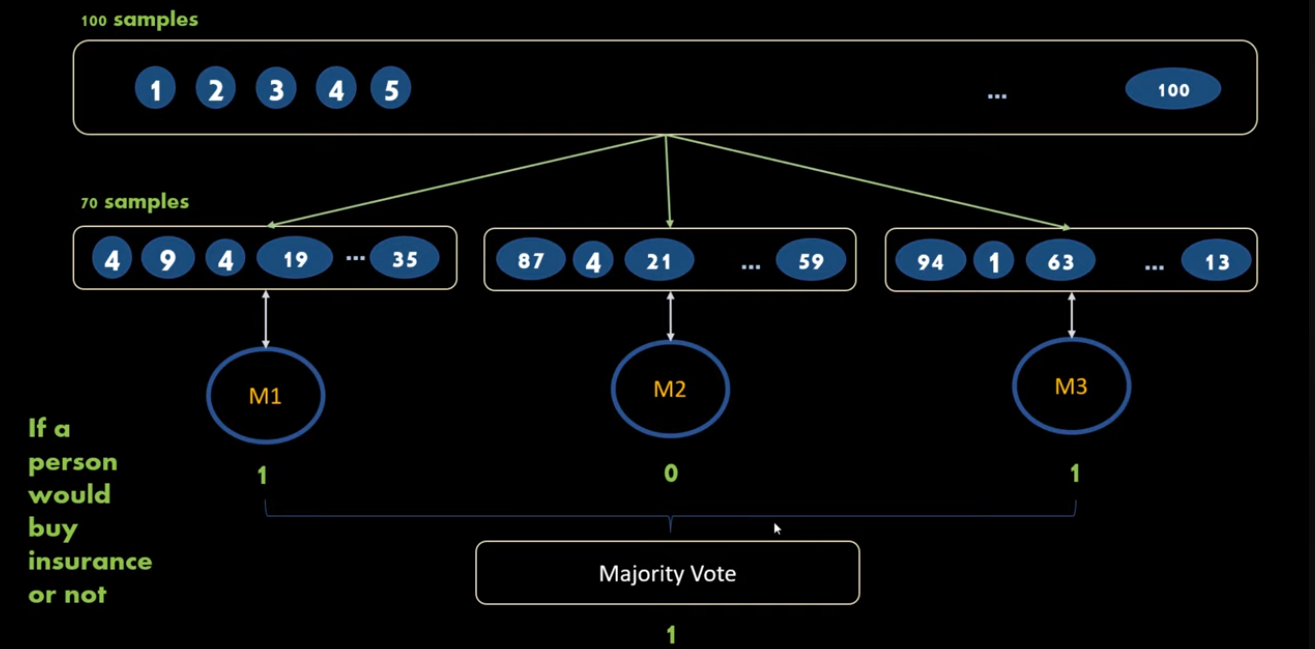

In this notebook we will use [pima indian diabetes](https://www.kaggle.com/datasets/gargmanas/pima-indians-diabetes) dataset to predict if a person has a diabetes or not based on certain features such as blood pressure, skin thickness, age etc. We will train a standalone model first and then use bagging ensemble technique to check how it can improve the performance of the model

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [26]:
X = df.drop("Outcome",axis="columns")
y = df.Outcome

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)

First train using standalone model

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.7012987 , 0.66233766, 0.67532468, 0.81045752, 0.73856209])

In [30]:
scores.mean()

np.float64(0.7175961293608353)

Train using Bagging

In [31]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_ #Each tree is trained on a random bootstrap sample, some data points don’t get picked,these are called Out-of-Bag (OOB) samples.

0.7534722222222222

In [32]:
bag_model.score(X_test, y_test)

0.7760416666666666

using cross validation score

In [33]:
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, X, y, cv=5)
scores

array([0.75324675, 0.72727273, 0.74675325, 0.82352941, 0.73856209])

In [34]:
scores.mean()

np.float64(0.7578728461081402)

Train using Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=5)
scores.mean()

np.float64(0.7592224768695357)